In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('../mplstyles/stylelib/standard.mplstyle')

#other computational libraries
import numpy as np

# Summary

The Lindhard description (J. Lindhard _et al_., _Notes on Atomic Collisions III_ (NACIII), Mat. Fys. Medd. K. Dan. Vidensk. Selsk **33**, 10 (1963)) includes theoretical estimates for the ionization production variance in generalized nuclear stopping. The purpose of this note is to recast these results in terms of the effective Fano factor and make it clear precisely where we got the Lindhard model information from, and how we turn the generalized nuclear stopping result into the specific results for both silicon and germanium. 



# Extracting the Lindhard Function(s)

In the Lindhard reference above (J. Lindhard _et al_., Mat. Fys. Medd. K. Dan. Vidensk. Selsk **33**, 10 (1963)), Figure 8 contains the information we need and is reproduced below. 

<img src="pics/lindhard2_curves.png" alt="Lindhard ionization variance" style="width: 600px;"/>

The red and green curves report the fractional variance $(\Omega/\epsilon)^2$ in phonon (heat) energy produced by a nucleus with a given initial non-dimensionalized energy $\epsilon$. The variable $\bar{\eta}$ is the average non-dimensionalized ionization energy for a stopping nucleus of a given initial energy. These variables are the same as the definitions in the Lindhard publication already mentioned.

The red and green curves report the same quantity in two different approximations D and E. All of the approximations used up to D are cumulatively applied (i.e. approximations A, B, C). They are: (A) electrons do not producte recoil atoms with appreciable energies; (B) the atomic binding energy is neglected; and (C) the energy transfer to a single electron is small in relative measure compared to the total energy transfer. 

  * Approximation D (red curve): Includes A,B,C and the following. The nuclear and electronic collisions are separable. Roughly, this means that a single collision does not produce energy transfer to a nucleus (atom) and an electron or group of electrons. It is argued in the Lindhard paper that this is plausible because different ranges of the impact parameter are expected to be responsible for each collision (electron collisions at mostly high impact parameter; nuclear at low).     
     
  * Approximation E (green curve): Includes A,B,C,D and the following. Nuclear collisions are forward. That is, the energy transferred from the atom to a second recoiling nucleus is much smaller than the energy that the atom originally had. 

From the `pdf` file for the publication listed we extracted the curves by first using `inkscape` to draw colored Bezier curves over the curves of interest and then extracting the `svg` points for those curves from the resulting saved `svg` figure. For now instead of using the `svg` extraction, we are using `DataThief` to extract the colored curves. The results are contained in the text files below: `data/lindhard2_OmegaepsD_fmt.txt` and `data/lindhard2_OmegaepsE_fmt.txt` and this data is used for any further manipulation of these theoretical curves.

The `png` file and the `svg` files produced from the `pdf` of the Lindhard publication are stored in this repository as `pics/lindhard2_curves.png` and `pics/lindhard2_curves.svg` respectively.

In [2]:
import dataPython as dp

lind_data0 = dp.getXYdata('data/lindhard2_OmegaepsD_fmt.txt')
lind_data1 = dp.getXYdata('data/lindhard2_OmegaepsE_fmt.txt')

lindD_e = np.asarray(lind_data0['xx'])
lindD = np.asarray(lind_data0['yy'])
lindE_e = np.asarray(lind_data1['xx'])
lindE = np.asarray(lind_data1['yy'])

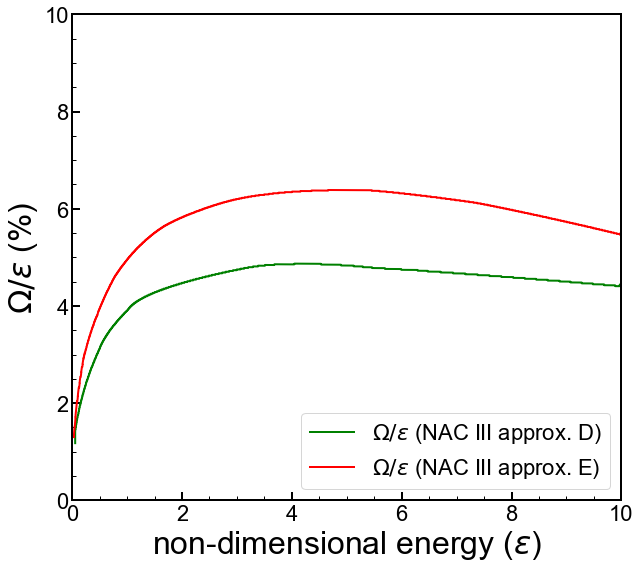

In [3]:
#set up a plot

fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

xmax=10

#ax1.errorbar(ddata_e,ddata_fluct,yerr=[ddata_fluct_err,ddata_fluct_err], marker='o', markersize=8, \
#             ecolor='k',color='k', linestyle='none', label='Dougherty Excess Fluctuation', linewidth=2)


#ax1.plot (X, diff, 'm-', label='Thomas-Fermi (newgrad)')
#ax1.plot (Esi(epr), 100*np.sqrt(f_Omega2_eta2(epr))*ylindv(1000*Esi(epr)), 'g-', label='$\Omega/\epsilon$ (NAC III approx. D)')
ax1.plot (lindD_e, np.sqrt(lindD)*100, 'g-', label='$\Omega/\epsilon$ (NAC III approx. D)')
ax1.plot (lindE_e, np.sqrt(lindE)*100, 'r-', label='$\Omega/\epsilon$ (NAC III approx. E)')




ax1.set_yscale('linear')
ax1.set_xscale('linear')
ax1.set_xlim(0.0, xmax)
ax1.set_ylim(0,10)
ax1.set_xlabel('non-dimensional energy ($\epsilon$)')
ax1.set_ylabel('$\Omega/\epsilon$ (%)')
#ax1.grid(True)
#ax1.xaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=4,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('figures/figure.png')
plt.show()



The next thing to do is to convert the non-dimensional energy $\epsilon$ into the recoil energy for silicon or germanium. The equation to do this comes from the Lindhard reference (J. Lindhard _et al_., Mat. Fys. Medd. K. Dan. Vidensk. Selsk **33**, 10 (1963)), just below Eq. 1.1. 

\begin{equation}
\epsilon = E \frac{aM_1}{Z_1 Z_2 e^2(M_1+M_2)},
\end{equation}

where $a$ is the effective "size" of the atom, analagous to the Bohr radius $a_0$. E is the energy of the incoming atom, $M_1$ and $M_2$ are the masses of the projectile and target respectively, $Z_1$ and $Z_2$ are the atomic numbers of the projectile and target respectively, and $e$ is the electronic charge. The expression is in Gaussian-cgs units [[Gauss-cgs][Gauss-cgs]]. 

[Gauss-cgs]: https://en.wikipedia.org/wiki/Gaussian_units "Wikipedia: Gaussian-cgs Units"

In the Lindhard paper, a generic screened potential is used in order to produce a universal description of slowing atoms. 

\begin{equation}
a = 0.8853 \frac{a_0}{\left(Z_1^{\frac{2}{3}} + Z_2^{\frac{2}{3}}\right)^{\frac{1}{2}}}
\end{equation}

Since we are working from an "active target" perspective, the projectile and target atoms will be the same, so we always have $Z_1=Z_2$ and $M_1=M_2$. Using these simplifications and converting to _natural units_ ($\hbar = c = 1$) the dimensionless energy comes to:

\begin{equation}
\epsilon = E\cdot 0.8853\frac{a_0^2 m_e}{2\sqrt{2} Z^2 Z^{\frac{1}{3}}}.
\end{equation}

If we simplify this expression to a simple scaling between $E$ and $\epsilon$, assuming that $E$ is measured in kilo-electron volts (keV), we find:

\begin{equation}
\begin{aligned}
\epsilon_{Si} &= \mathrm{0.02432} \cdot E_{Si} \mathrm{(keV)} \\
\epsilon_{Ge} &= \mathrm{0.00353} \cdot E_{Ge} \mathrm{(keV)}, 
\end{aligned}
\end{equation}

for silicon and germanium respectively. This can also be re-written:

\begin{equation}
\begin{aligned}
E_{Si} \mathrm{[keV]} &= \frac{2\sqrt{2}\epsilon_{Si}}{6.878e^{-2}} \\
E_{Ge} \mathrm{[keV]} &= \frac{2\sqrt{2}\epsilon_{Ge}}{9.998e^{-3}}. 
\end{aligned}
\end{equation}

In [4]:
#we can make useful helper functions
Esi = np.vectorize(lambda x: np.sqrt(2)*2*x/(6.87758e-2))
Ege = np.vectorize(lambda x: np.sqrt(2)*2*x/(9.99844e-3))

We also need to translate the $\Omega/\epsilon$ into an effective Fano factor. Typically, for each event the non-dimensionalized ionization and phonon energy released are denoted $\eta$ and $\nu$ respectively. Since they add to $\epsilon$, we have (explicitly calling out the functional dependence on $\epsilon$):

\begin{equation}
\epsilon = \nu(\epsilon) + \eta(\epsilon).
\end{equation}

This means that since $\Omega^2$ is the variance in $\nu$ it is also the variance in $\eta$ because $\epsilon$ is constant, known, and exact. That means that the expression:

\begin{equation}
\frac{\Omega}{\eta} 
\end{equation}

is equal to the fractional width of the ionization energy produced in the interaction. It is therefore equal to:

\begin{equation}
\frac{\sigma_N}{\bar{N}},
\end{equation}

where N is the number of electron-hole pairs produced in an interaction. Since the effective Fano factor has $\sigma_N$ parameterized as $\sqrt{F_{NR}\bar{N}}$, we can use the above equality to find that:

\begin{equation}
F_{NR} = \bar{N}\left(\frac{\epsilon}{\eta}\right)^2\left(\frac{\Omega}{\epsilon} \right)^2.
\end{equation}

If we re-arrange using the ionization yeild as a function of recoil energy, $Y(E_r)$ we would get:

\begin{equation}
F_{NR} = \frac{E_r}{\epsilon_{\gamma}Y(E_r)} \left(\frac{\Omega}{\epsilon}\right)^2,
\end{equation}

where $\epsilon_{\gamma}$ is the average deposited energy it takes to produce a single electron-hole pair with an electron recoil in the material. This means that we now have the predicted effective Fano factor for a nuclear recoil in terms of measured quantity $\epsilon_{\gamma}$ and the theoretical quantities from the Lindhard publication: $Y(E_r)$ and $\frac{\Omega}{\epsilon}$.

In [5]:
#create a yield model
import lindhard as lind

#lindhard
lpar_Si = lind.getLindhardPars('Si',True) #use the "calculated" value of k
print(lpar_Si)
lpar_Ge = lind.getLindhardPars('Ge',True) #use the "calculated" value of k
print(lpar_Ge)

ylindSi = lind.getLindhard(lpar_Si)
ylindGe = lind.getLindhard(lpar_Ge)

#If you want to set by k value alone
#ylindSi = lind.getLindhardSi_k(0.15)
#ylindGe = lind.getLindhardGe_k(0.15)

ylindSiv = np.vectorize(ylindSi) #careful, this expects inputs in eV
ylindGev = np.vectorize(ylindGe) #careful, this expects inputs in eV

{'Z': 14, 'A': 28, 'k': 0.14600172346755985, 'a': 3.0, 'b': 0.15, 'c': 0.7, 'd': 0.6}
{'Z': 32, 'A': 73, 'k': 0.15690021177984914, 'a': 3.0, 'b': 0.15, 'c': 0.7, 'd': 0.6}


In [6]:
#epsg also depends on material
#use Knoll, Radiation Detection and Measurement, 4th edition, pg 368
#actually these look out of date--need to find references for these values that "I think I know"
epsg_Si = 3.8e-3 #keV average energy per electron-hole pair created
epsg_Ge = 3.33e-3 #keV average energy per electron-hole pair created


F_D_Si = Esi(lindD_e)*(1/(epsg_Si*ylindSiv(1000*Esi(lindD_e))))*lindD
F_E_Si = Esi(lindE_e)*(1/(epsg_Si*ylindSiv(1000*Esi(lindE_e))))*lindE

F_D_Ge = Ege(lindD_e)*(1/(epsg_Ge*ylindGev(1000*Ege(lindD_e))))*lindD
F_E_Ge = Ege(lindE_e)*(1/(epsg_Ge*ylindGev(1000*Ege(lindE_e))))*lindE

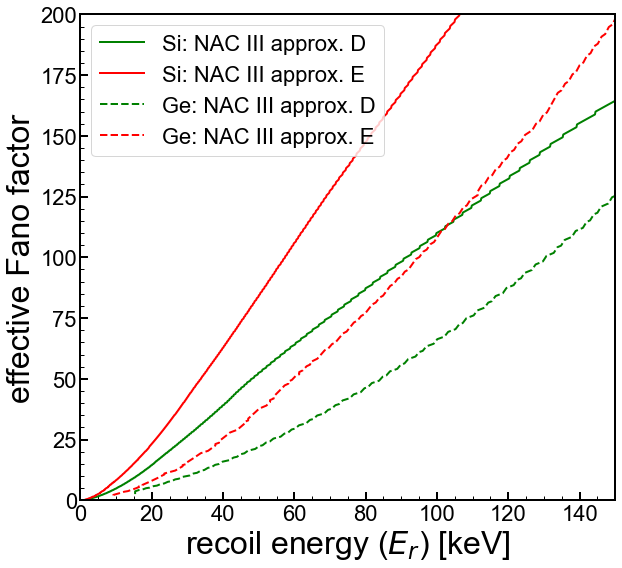

In [7]:
#set up a plot

fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

xmax=10

#ax1.errorbar(ddata_e,ddata_fluct,yerr=[ddata_fluct_err,ddata_fluct_err], marker='o', markersize=8, \
#             ecolor='k',color='k', linestyle='none', label='Dougherty Excess Fluctuation', linewidth=2)


#ax1.plot (X, diff, 'm-', label='Thomas-Fermi (newgrad)')
#ax1.plot (Esi(epr), 100*np.sqrt(f_Omega2_eta2(epr))*ylindv(1000*Esi(epr)), 'g-', label='$\Omega/\epsilon$ (NAC III approx. D)')
ax1.plot (Esi(lindD_e), F_D_Si, 'g-', label='Si: NAC III approx. D')
ax1.plot (Esi(lindE_e), F_E_Si, 'r-', label='Si: NAC III approx. E')
ax1.plot (Ege(lindD_e), F_D_Ge, 'g--', label='Ge: NAC III approx. D')
ax1.plot (Ege(lindE_e), F_E_Ge, 'r--', label='Ge: NAC III approx. E')




ax1.set_yscale('linear')
ax1.set_xscale('linear')
ax1.set_xlim(Esi(0), 150)
ax1.set_ylim(0,200)
ax1.set_xlabel('recoil energy ($E_r$) [keV]')
ax1.set_ylabel('effective Fano factor')
#ax1.grid(True)
#ax1.xaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=2,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('figures/lindhard_effectiveF_SiGe.png')
plt.show()

# Other Model Average Ionization Yield Functions

The effective Fano factor plotted above is dependent on the average ionization yield. The Lindhard (NAC III) publication produces a prediction for that which is consistent with the variance prediction. Those are the predictions that are used above. 

In the course of our work or in other publications, we have seen fit to use other functional forms that are either convenient or fit the data well in some restricted area. One especially useful parameterization is:

\begin{equation}
Q(E_r) = AE_r^B,
\end{equation}

Where the variable $Q(E_r)$ is the average ionization yield as a function of nuclear recoil energy $E_r$. We switch over to the symbol $Q$ for consistency with the Edelweiss publication. 

The values of $A$ and $B$ begin at 0.16 and 0.18 respectively. Our best fit obtained values of $A$ = 0.09 and $B$ = 0.15. 

We plot the Effective Fano factor below for Germanium given these different values. 

In [8]:
Q_edw = lambda Er: 0.16*Er**0.18

Q_fit = lambda Er: 0.09*Er**0.15

Q_edwv = np.vectorize(Q_edw)
Q_fitv = np.vectorize(Q_fit)

In [9]:
F_D_Ge_Edw = Ege(lindD_e)*(1/(epsg_Ge*Q_edwv(Ege(lindD_e))))*lindD
F_E_Ge_Edw = Ege(lindE_e)*(1/(epsg_Ge*Q_edwv(Ege(lindE_e))))*lindE

F_D_Ge_fit = Ege(lindD_e)*(1/(epsg_Ge*Q_fitv(Ege(lindD_e))))*lindD
F_E_Ge_fit = Ege(lindE_e)*(1/(epsg_Ge*Q_fitv(Ege(lindE_e))))*lindE

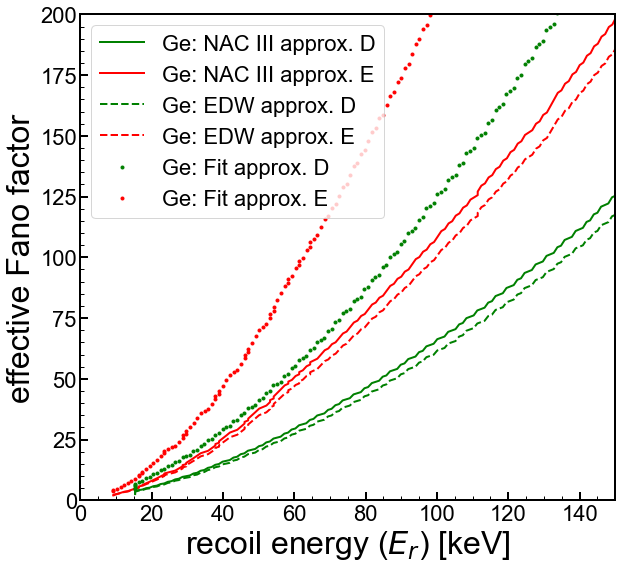

In [10]:
#set up a plot

fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

xmax=10

#ax1.errorbar(ddata_e,ddata_fluct,yerr=[ddata_fluct_err,ddata_fluct_err], marker='o', markersize=8, \
#             ecolor='k',color='k', linestyle='none', label='Dougherty Excess Fluctuation', linewidth=2)


#ax1.plot (X, diff, 'm-', label='Thomas-Fermi (newgrad)')
#ax1.plot (Esi(epr), 100*np.sqrt(f_Omega2_eta2(epr))*ylindv(1000*Esi(epr)), 'g-', label='$\Omega/\epsilon$ (NAC III approx. D)')
ax1.plot (Ege(lindD_e), F_D_Ge, 'g-', label='Ge: NAC III approx. D')
ax1.plot (Ege(lindE_e), F_E_Ge, 'r-', label='Ge: NAC III approx. E')
ax1.plot (Ege(lindD_e), F_D_Ge_Edw, 'g--', label='Ge: EDW approx. D')
ax1.plot (Ege(lindE_e), F_E_Ge_Edw, 'r--', label='Ge: EDW approx. E')
ax1.plot (Ege(lindD_e), F_D_Ge_fit, 'g.', label='Ge: Fit approx. D')
ax1.plot (Ege(lindE_e), F_E_Ge_fit, 'r.', label='Ge: Fit approx. E')




ax1.set_yscale('linear')
ax1.set_xscale('linear')
ax1.set_xlim(Esi(0), 150)
ax1.set_ylim(0,200)
ax1.set_xlabel('recoil energy ($E_r$) [keV]')
ax1.set_ylabel('effective Fano factor')
#ax1.grid(True)
#ax1.xaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=2,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('figures/lindhard_effectiveF_EdwAndFit_Ge.png')
plt.show()

From the plot we can see that the Edelweiss paper [[Edw2004][Edw2004]] parameterization is fairly close to the Lindhard parameterization, whereas our best fit to the data we have is not. We will use our best fit version of the average ionization yield to produce the Effective Fano results.

[Edw2004]: https://doi.org/10.1016/j.nima.2004.04.218 "Edelweiss 2004 paper reference"